In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

In [27]:
# Read in the training data
train_data = np.genfromtxt('mnist_train.csv', delimiter=',')
# The first row is the headers so we drop it
train_data = train_data[1:]

# Set up image data and labels
x_train = train_data[:,1:]
y_train = train_data[:,0]

In [25]:
# Read in the testing data
test_data = np.genfromtxt('mnist_test.csv', delimiter=',')
# The first row is the headers so we drop it
test_data = test_data[1:]

# Set up image data and labels
x_test = test_data[:,1:]
y_test = test_data[:,0]

In [28]:
# Form the image data into 28x28 arrays since the data is originally 1D arrays
x_train = x_train.reshape((60000, 28, 28))
x_test = x_test.reshape((10000, 28, 28))

In [29]:
# Filter out the digits which aren't 0 or 1
train_mask = (y_train == 0) | (y_train == 1)

x_train_masked = x_train[train_mask]
y_train_masked = y_train[train_mask]

In [5]:
test_mask = (y_test == 0) | (y_test == 1)
x_test_masked = x_test[test_mask]
y_test_masked = y_test[test_mask]

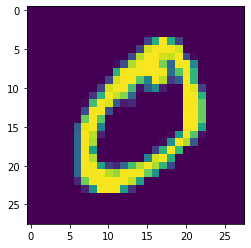

In [6]:
plt.imshow(x_train_masked[0])

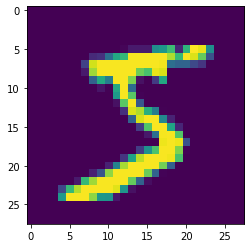

In [7]:
plt.imshow(x_train[0])

In [35]:
import MyClassifier_10 as cl

In [36]:
classifier = cl.MyClassifier(0, 0)

In [ ]:
classifier.train(1, 0, 1, x_train, y_train)

1.
2. 0.001961946487426758


In [ ]:
train_classes = classifier.classify(x_train_masked)
test_classes = classifier.classify(x_test_masked)

In [ ]:
# Compute the accuracy for the classifications
train_accuracy = sum(abs(train_classes == y_train_masked)) / len(y_train_masked)
test_accuracy = sum(abs(test_classes == y_test_masked)) / len(y_test_masked)

In [31]:
train_accuracy

1.0

In [32]:
test_accuracy

0.9957446808510638

In [30]:
# A function which applies noise to the training or testing data
def apply_error(images, p):
    corrupt_images = images.copy()
    for i, image in enumerate(images):
        error = np.random.random((28, 28)) >= p
        corrupt_image = image * error
        corrupt_images[i] = corrupt_image
    return corrupt_images

In [55]:
corrupt_x_test_masked = apply_error(x_test_masked, 0.6)
corrupt_test_classes = classifier.classify(corrupt_x_test_masked)
corrupt_test_accuracy = sum(abs(corrupt_test_classes == y_test_masked)) / len(y_test_masked)

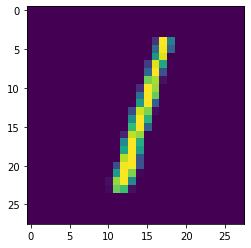

In [65]:
plt.imshow(x_test_masked[0])

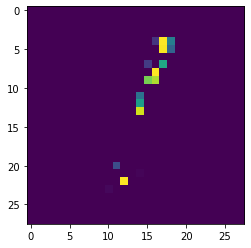

In [66]:
plt.imshow(corrupt_x_test_masked[0])

In [56]:
corrupt_test_accuracy

0.7782505910165485